In [36]:
from math import ceil, log
from time import time
from typing import Callable
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

# 1.- Método de la bisección

In [37]:
def bisec(fn: Callable, interval: tuple, error: float = 0.000000001, r: float = 0, max_iters:int = 20, iter:int = 1) -> any:
    a, b = interval
    m = (a + b) / 2
    fa = fn(a)
    fb = fn(b)
    fm = fn(m)
    delta = lambda x1, x2: abs(x2 - x1)/ x2

    if max_iters == iter:
        return m

    if fa == 0: 
        return a
    if fb == 0:
        return b

    if fa * fb < 0:
        # if abs((m - r) / m) <= error:
        if abs(fm) <= error:
            return m

        if fm * fa < 0:
            return bisec(fn, (a, m), error, m, max_iters, iter + 1)

        return bisec(fn, (m, b), error, m, max_iters, iter + 1)

    raise Exception('Bisection methond cannot be applied')

In [38]:
def plot_bisec(fn: Callable, interval: tuple):
    start = time()
    r = bisec(fn, interval)
    end = time()

    elapsed = (end - start) * 1000

    a, b = interval
    x = np.linspace(a - 2, b + 1, 100)
    y = fn(x)
    yr = fn(r)
    plt.plot(x, y)
    plt.scatter(r, yr, color = "black")
    plt.text(r, yr + 1, f'Found f({r:.2f}) = 0 in {elapsed:.2f}ms')
    plt.show()

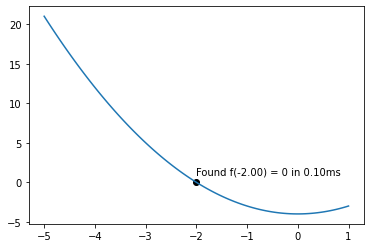

In [39]:
plot_bisec(lambda x: x ** 2 - 4, (-3, 0))

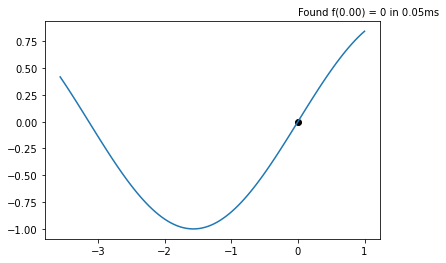

In [40]:
plot_bisec(lambda x: np.sin(x), (-np.pi / 2, 0))